In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.axes import Axes
#import HTSeq
import pandas as pd
import itertools
import os
import seaborn as sns
import pandas as pd
from Bio import SeqIO
from Bio import SeqUtils

In [2]:
full_path ='/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/analysis/PacBio_SCH1743/FALCON_0_4_assemblies/p_assemblies/v9_1/032017_assembly/'
outdir = '/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/analysis/PacBio_SCH1743/FALCON_0_4_assemblies/p_assemblies/v9_1/Pst_104E_v12/figures'
circa_path = '/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/analysis/PacBio_SCH1743/FALCON_0_4_assemblies/p_assemblies/v9_1/Pst_104E_v12/circa'

In [3]:
filename = os.walk(full_path, topdown=False)
if not os.path.exists(outdir):
    os.mkdir(outdir)
os.chdir(outdir)

In [4]:
list(filename)[-1][2]

['hcontig_greater_2000.txt',
 'hcontig_smaller_2000.txt',
 'pcontig_greater_2000.txt',
 'pcontig_smaller_2000.txt',
 'Pst_104E_v12_h_ctg.anno.CDS.fa',
 'Pst_104E_v12_h_ctg.anno.CDS.gff3',
 'Pst_104E_v12_h_ctg.anno.gene.fa',
 'Pst_104E_v12_h_ctg.anno.gff3',
 'Pst_104E_v12_h_ctg.anno.protein.fa',
 'Pst_104E_v12_h_ctg.fa',
 'Pst_104E_v12_h_ctg.fa.fai',
 'Pst_104E_v12_h_ctg.genome_file',
 'Pst_104E_v12_h_ctg.REPET.gff',
 'Pst_104E_v12_p_ctg.anno.CDS.fa',
 'Pst_104E_v12_p_ctg.anno.CDS.gff3',
 'Pst_104E_v12_p_ctg.anno.gene.fa',
 'Pst_104E_v12_p_ctg.anno.gff3',
 'Pst_104E_v12_p_ctg.anno.protein.fa',
 'Pst_104E_v12_p_ctg.fa',
 'Pst_104E_v12_p_ctg.fa.fai',
 'Pst_104E_v12_p_ctg.genome_file',
 'Pst_104E_v12_p_ctg.REPET.gff',
 'Pst_104E_v12_ph_ctg.anno.CDS.fa',
 'Pst_104E_v12_ph_ctg.anno.CDS.gff3',
 'Pst_104E_v12_ph_ctg.anno.gff3',
 'Pst_104E_v12_ph_ctg.anno.protein.fa',
 'Pst_104E_v12_ph_ctg.fa',
 'Pst_104E_v12_ph_ctg.fa.fai',
 'Pst_104E_v12_ph_ctg.REPET.gff',
 'Pst_104E_v12_pwh.txt',
 'Pst_104E_

In [5]:
#change filename here
Pst_104E_p_ctg ='Pst_104E_v12_p_ctg.fa'
Pst_104E_h_ctg = 'Pst_104E_v12_h_ctg.fa'
Pst_130 = '/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST130/genome/GCA_000223505.1_PST-130_1.0_genomic.fna'
Pst_78 = '/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST78/data/genome/Pucst_PST78_1_AssemblyScaffolds.fasta'

In [6]:
max_length = 3073024 #Pst_104E_p_ctg_df.Length.max()

In [7]:
bins = [x for x in range(0, max_length+20, int((max_length+20)/19 ))] 

In [8]:
#reading the different columns of the dataframe
def make_genome_df (filename, _max_length):
    """Make a genome dataframe for each genome."""
    with open(filename, mode='rU') as f:
        contigs = SeqIO.parse(filename, 'fasta')
    contig_length = []
    contig_id =[]
    contig_GC = []
    assembly_id = []
    for x in contigs:
        contig_id.append(x.id)
        contig_length.append(len(x.seq))
        contig_GC.append(SeqUtils.GC(x.seq))
        assembly_id.append(filename.split('/')[-1])
    bins = [x for x in range(0, _max_length+20, int((_max_length+20)/19 ))]
    s1 = pd.Series(contig_id, name='ID')
    s2 = pd.Series(contig_length, name='Length')
    s3 = pd.Series(contig_GC, name='%GC')
    s4 = pd.Series(assembly_id, name="Assembly")
    contig_df = pd.concat([s1, s2, s3, s4], axis=1)
    contig_df.sort_values('Length', inplace=True)
    contig_df.reset_index(drop=True, inplace= True)
    contig_df['Length_cumsum'] = contig_df['Length'].cumsum()
    contig_df["Length_cumsum_reverse"] = contig_df.sort_values(by='Length', ascending=False)['Length'].cumsum()[::-1]
    contig_df['Length_bin'] = pd.cut(contig_df['Length'],bins)
    contig_df['Length_bin_left'] = contig_df.Length_bin.str.extract(r'([0-9]*), [0-9]*')
    return contig_df

In [9]:
Pst_78_df = make_genome_df(Pst_78,max_length)

/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 'U' mode is deprecated
/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [10]:
Pst_104E_p_ctg_df = make_genome_df(os.path.join(full_path, Pst_104E_p_ctg),max_length)

/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 'U' mode is deprecated
/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [11]:
Pst_104E_h_ctg_df = make_genome_df(os.path.join(full_path, Pst_104E_h_ctg),max_length)

/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 'U' mode is deprecated
/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [12]:
Pst_130_df = make_genome_df(Pst_130,max_length)

/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 'U' mode is deprecated
/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [13]:
#function to plot hist_of readlength distribution and CS plot
def hist_CS_plot(x, file_name='N/A', x_max = False):
    #the input data frame needs to be reset to sort by values, index reset, and new CS calculated
    y = x.sort_values(by='Length')
    y = y.reset_index(drop=True)
    y['CS_length'] = y['Length'].cumsum()
    #histogram of 
    label_config_x = {'fontsize'            : 'large',
          'verticalalignment'   : 'top',
          'horizontalalignment' : 'center'
          }
    label_config_y = {'fontsize'            : 'large',
          'verticalalignment'   : 'bottom',
          'horizontalalignment' : 'center'
          }
    fig, ax1 = plt.subplots(figsize=(15,9))
    x['Length'].plot.hist(bins=15, color='w', edgecolor='k', linewidth = 2, label = 'Contig bin')
    plt.xlim(0, y['Length'][len(y['Length'])-1]*1.5)
    plt.ylabel("Frequency",**label_config_y)
    plt.xlabel("Contig Length",**label_config_x)
    plt.title('Contig Length Distribution '+file_name)
    plt.legend(loc=9)

    #second plot

    ax2 = ax1.twinx()
    plt.scatter(y['Length'], y['CS_length'], c='k', label='CS length')
    plt.ylim(0, y['CS_length'][len(y['CS_length'])-1]*1.1)
    if x_max >  y['Length'][len(y['Length'])-1]*1.1:
        plt.xlim(0, x_max)
    else:
        plt.xlim(0, y['Length'][len(y['Length'])-1]*1.1)
    plt.xlabel("Contig Length",**label_config_x)
    #plt.semilogx('log')
    plt.ylabel("Culmulative Contig Length",**label_config_y)
    ax2.yaxis

    plt.legend(loc=5)
    return fig

In [14]:
Pst_104E_p_ctg_df.tail()

,ID,Length,%GC,Assembly,Length_cumsum,Length_cumsum_reverse,Length_bin,Length_bin_left
151,pcontig_005,2199355,44.430617,Pst_104E_v12_p_ctg.fa,72690093,12864878,"(2102607, 2264346]",2102607
152,pcontig_002,2342972,44.844625,Pst_104E_v12_p_ctg.fa,75033065,10665523,"(2264346, 2426085]",2264346
153,pcontig_003,2392543,44.391720,Pst_104E_v12_p_ctg.fa,77425608,8322551,"(2264346, 2426085]",2264346
154,pcontig_001,2856984,44.484253,Pst_104E_v12_p_ctg.fa,80282592,5930008,"(2749563, 2911302]",2749563
155,pcontig_000,3073024,44.124485,Pst_104E_v12_p_ctg.fa,83355616,3073024,"(2911302, 3073041]",2911302


In [15]:
predicted_g_size = 85000000

In [16]:
Pst_104E_p_ctg_df[Pst_104E_p_ctg_df.Length_cumsum > 0.5 *predicted_g_size]['Length'].head(1)

134    1360396
Name: Length, dtype: int64

Fix NG50 calcuation and all the other jazz with labels and such as well.

In [17]:
Pst_104E_p_ctg_df.columns

Index(['ID', 'Length', '%GC', 'Assembly', 'Length_cumsum',
       'Length_cumsum_reverse', 'Length_bin', 'Length_bin_left'],
      dtype='object')

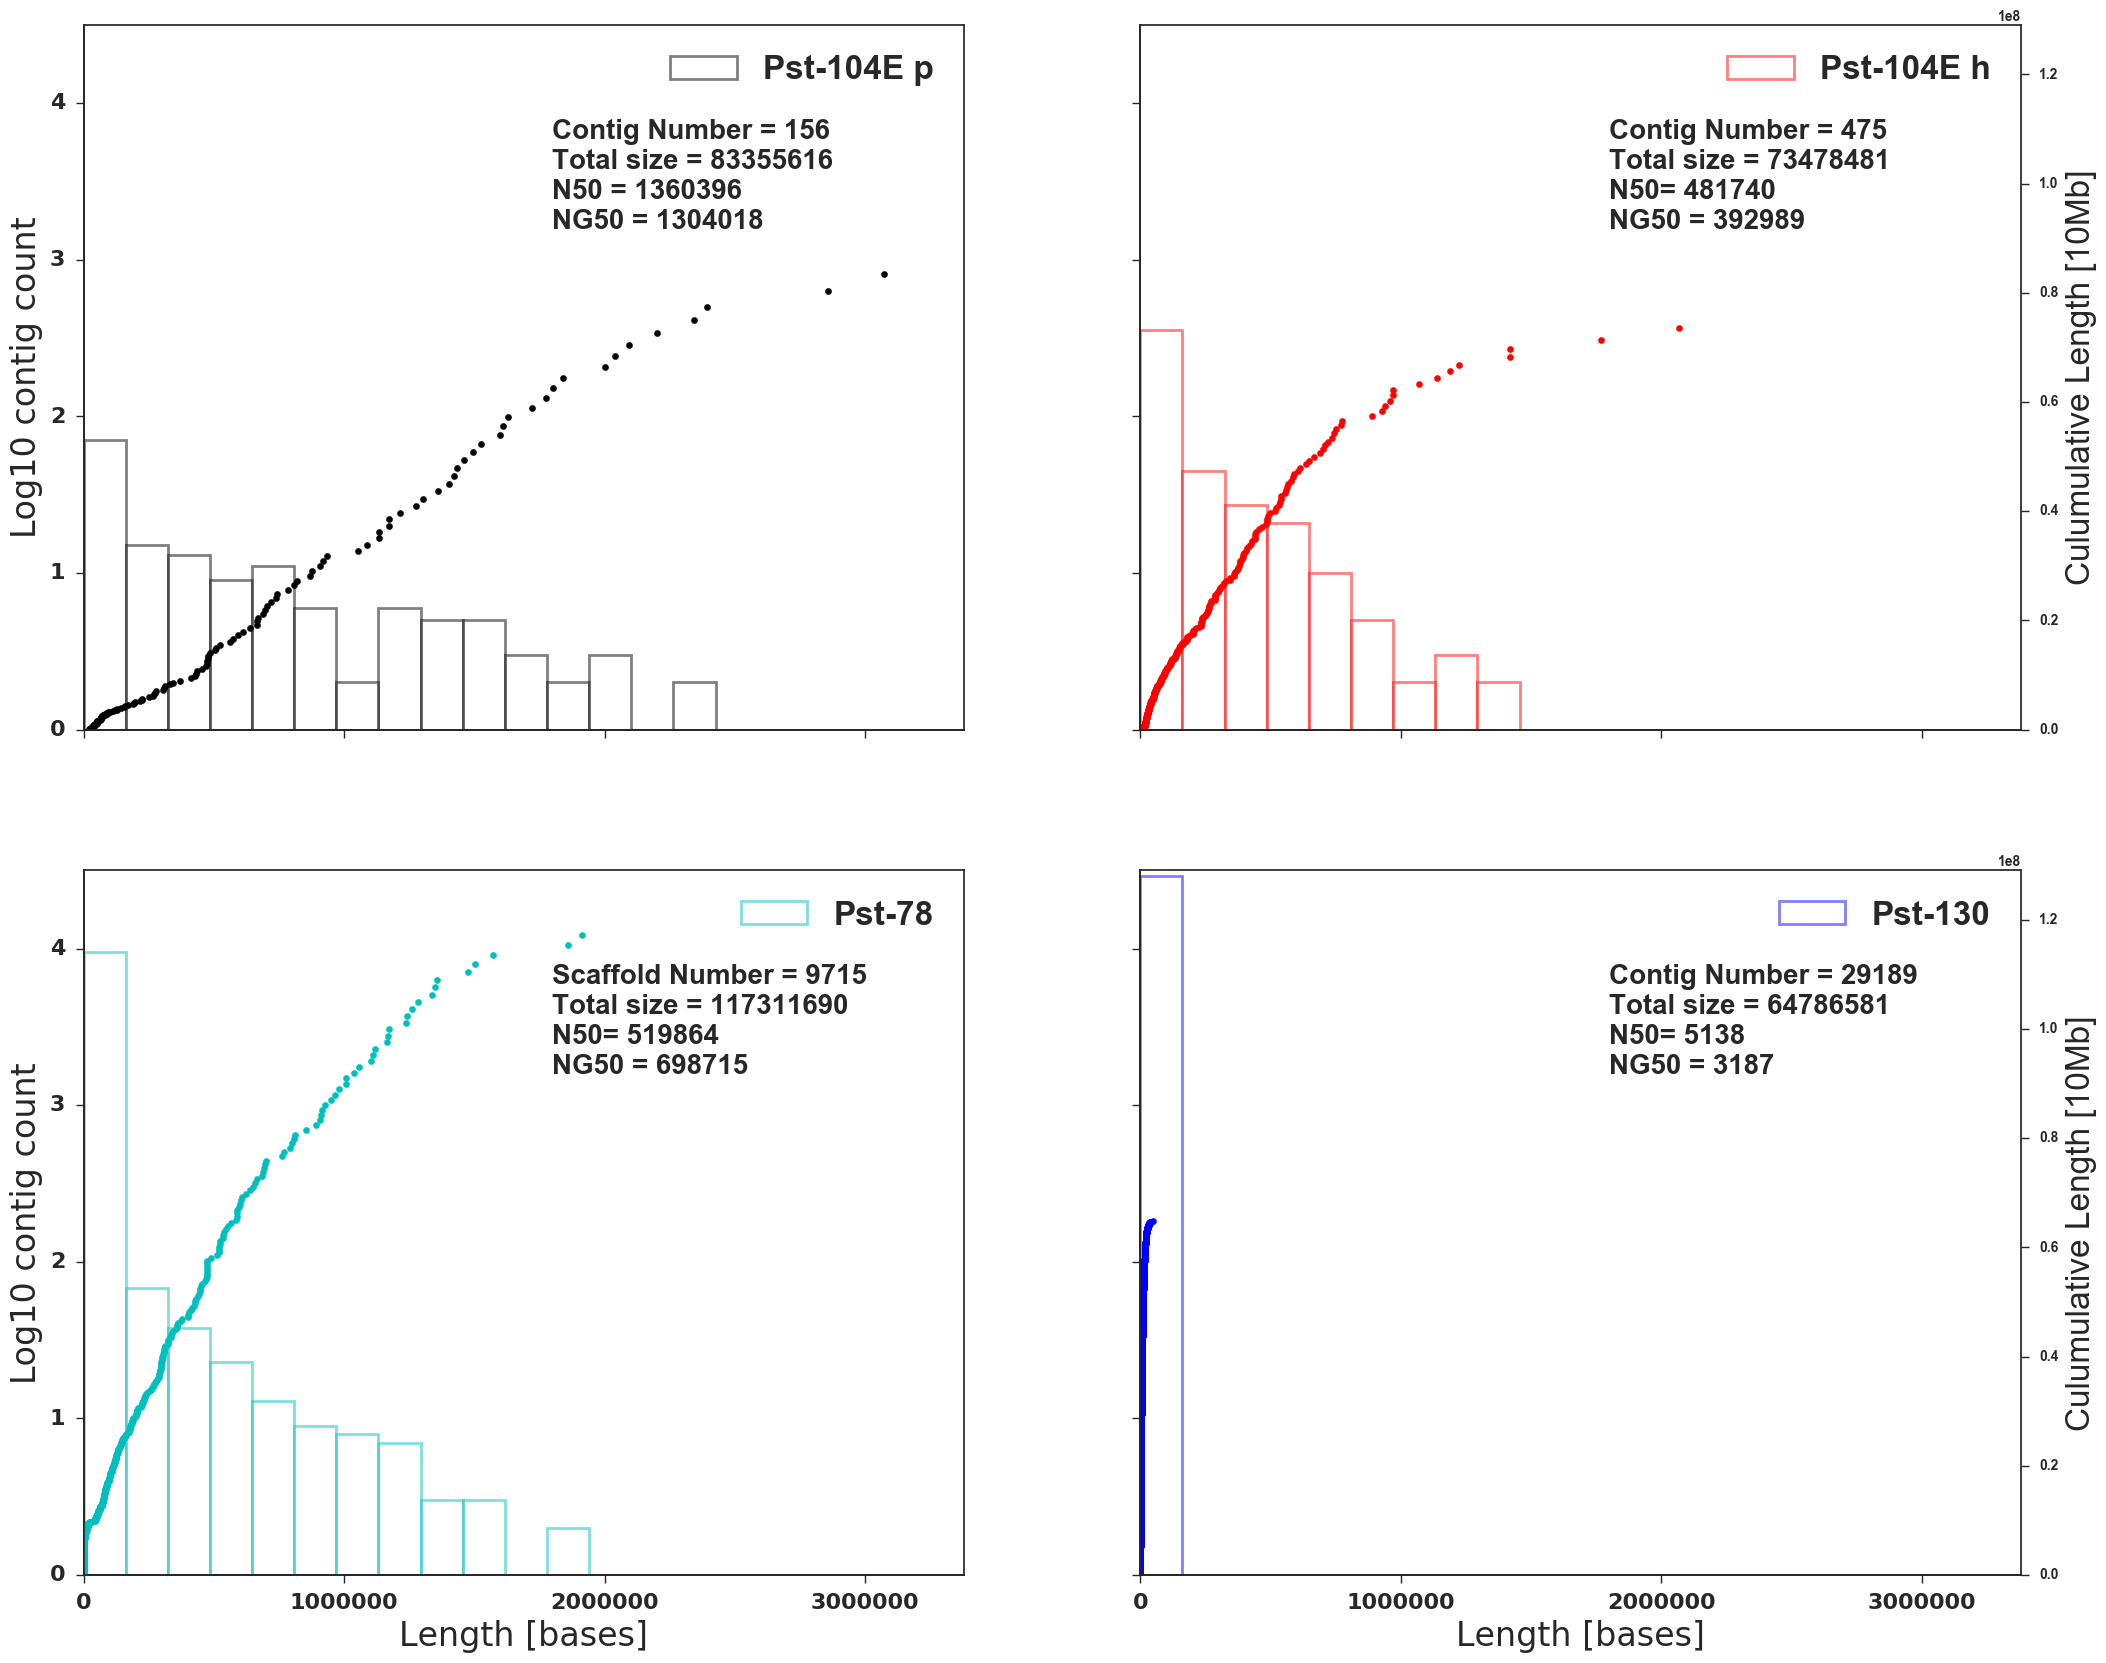

In [23]:
#histogram of 
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(2, 2, figsize=(25,20), sharex='all', sharey='all')

#set style
sns.set_style("ticks")
sns.despine()

#set font size
fs = 24

ax1[0,0].bar(Pst_104E_p_ctg_df.groupby('Length_bin_left')['Length'].count().index,\
        np.log10(Pst_104E_p_ctg_df.groupby('Length_bin_left')['Length'].count()), color='w',\
        edgecolor='k', linewidth = 2,  alpha=0.5, width=bins[1], label="Pst-104E p")

ax1[0,0].text(1800000, 3.2,\
              'Contig Number = %i\nTotal size = %i\nN50 = %i\nNG50 = %i'%\
              (len(Pst_104E_p_ctg_df), Pst_104E_p_ctg_df.Length.sum(), \
               Pst_104E_p_ctg_df[Pst_104E_p_ctg_df.Length_cumsum_reverse < 0.5 *Pst_104E_p_ctg_df.Length.sum()]['Length'].head(1),\
               Pst_104E_p_ctg_df[Pst_104E_p_ctg_df.Length_cumsum_reverse < 0.5 *predicted_g_size]['Length'].head(1))\
              ,horizontalalignment='left')

ax1[0,1].bar(Pst_104E_h_ctg_df.groupby('Length_bin_left')['Length'].count().index,\
        np.log10(Pst_104E_h_ctg_df.groupby('Length_bin_left')['Length'].count()), color='w',\
        edgecolor='r', linewidth = 2,  alpha=0.5, width=bins[1], label='Pst-104E h')

ax1[0,1].text(1800000, 3.2,\
              'Contig Number = %i\nTotal size = %i\nN50= %i\nNG50 = %i'%\
              (len(Pst_104E_h_ctg_df), Pst_104E_h_ctg_df.Length.sum(), \
               Pst_104E_h_ctg_df[Pst_104E_h_ctg_df.Length_cumsum_reverse < 0.5 *Pst_104E_h_ctg_df.Length.sum()]\
               ['Length'].head(1),\
              Pst_104E_h_ctg_df[Pst_104E_h_ctg_df.Length_cumsum_reverse < 0.5 *predicted_g_size]['Length'].head(1)),horizontalalignment='left')


ax1[1,1].bar(Pst_130_df.groupby('Length_bin_left')['Length'].count().index,\
        np.log10(Pst_130_df.groupby('Length_bin_left')['Length'].count()), color='w',\
        edgecolor='b', linewidth = 2,  alpha=0.5, width=bins[1],label='Pst-130')

ax1[1,1].text(1800000, 3.2,\
              'Contig Number = %i\nTotal size = %i\nN50= %i\nNG50 = %i'%\
              (len(Pst_130_df), Pst_130_df.Length.sum(), \
               Pst_130_df[Pst_130_df.Length_cumsum_reverse < 0.5 *Pst_130_df.Length.sum()]\
               ['Length'].head(1),\
              Pst_130_df[Pst_130_df.Length_cumsum_reverse < 0.5 *predicted_g_size]['Length'].head(1)),horizontalalignment='left')

ax1[1,0].bar(Pst_78_df.groupby('Length_bin_left')['Length'].count().index,\
        np.log10(Pst_78_df.groupby('Length_bin_left')['Length'].count()), color='w',\
        edgecolor='c', linewidth = 2,  alpha=0.5, width=bins[1],label='Pst-78')

ax1[1,0].text(1800000, 3.2,\
              'Scaffold Number = %i\nTotal size = %i\nN50= %i\nNG50 = %i'%\
              (len(Pst_78_df), Pst_78_df.Length.sum(), \
               Pst_78_df[Pst_78_df.Length_cumsum_reverse < 0.5 *Pst_78_df.Length.sum()]\
               ['Length'].head(1),\
              Pst_78_df[Pst_78_df.Length_cumsum_reverse < 0.5 *predicted_g_size]['Length'].head(1)),\
              horizontalalignment='left')



    
#plt.ylabel("Frequency",**label_config_y)
#plt.xlabel("Contig Length",**label_config_x)
#plt.title('Contig Length Distribution '+Pst_104E_p_ctg_df['Assembly'].unique()[0][:-3])
#plt.legend(loc=1)
#second plot

#ax12 = ax1.twinx()
ax2 = ax1[0,0].twinx()
ax2.scatter(Pst_104E_p_ctg_df['Length'], Pst_104E_p_ctg_df['Length_cumsum'], c='k', label='Pst_104E_p contigs', edgecolor='k')
ax2.set_ylim(0, Pst_78_df['Length_cumsum'][len(Pst_78_df['Length_cumsum'])-1]*1.1)
ax2.get_yaxis().set_visible(False)
ax3 = ax1[0,1].twinx()
ax3.scatter(Pst_104E_h_ctg_df['Length'], Pst_104E_h_ctg_df['Length_cumsum'], c='r', label='Pst_104E_h contigs', edgecolor='r')
ax3.set_ylim(0, Pst_78_df['Length_cumsum'][len(Pst_78_df['Length_cumsum'])-1]*1.1)

ax4 = ax1[1,1].twinx()
ax4.scatter(Pst_130_df['Length'], Pst_130_df['Length_cumsum'], c='b', label='Pst_130 contigs', edgecolor='b')
ax4.set_ylim(0, Pst_78_df['Length_cumsum'][len(Pst_78_df['Length_cumsum'])-1]*1.1)
#ax4.set_yticklabels(ax4.get_ymajorticklabels(),fontsize=16)
ax5 = ax1[1,0].twinx()
ax5.scatter(Pst_78_df['Length'], Pst_78_df['Length_cumsum'], c='c', label='Pst_78_scaffolds', edgecolor='c')
ax5.set_ylim(0, Pst_78_df['Length_cumsum'][len(Pst_78_df['Length_cumsum'])-1]*1.1)
ax5.get_yaxis().set_visible(False)


for (m,n), subplot in np.ndenumerate(ax1):
    subplot.set_xlim(0, Pst_104E_p_ctg_df['Length'][len(Pst_104E_p_ctg_df['Length'])-1]*1.1)



ax1[0,0].set_ylabel('Log10 contig count',fontsize=fs)
plt.sca(ax1[0,0])
plt.yticks([0,1,2,3,4], fontsize = 16)
plt.legend(loc=5, fontsize=fs)
ax1[1,0].set_ylabel('Log10 contig count', fontsize=fs)
ax1[1,0].set_xlabel('Length [bases]', fontsize=fs)
ax1[1,1].set_xlabel('Length [bases]', fontsize=fs)
ax3.set_ylabel("Culumulative Length [10Mb]", fontsize=fs)
ax4.set_ylabel("Culumulative Length [10Mb]", fontsize=fs)


for (m,n), subplot in np.ndenumerate(ax1):
    plt.sca(subplot)
    plt.legend(loc=1, fontsize = fs)
    plt.xticks([0, 1000000, 2000000, 3000000], fontsize = 16)
    plt.yticks([0,1,2,3,4], fontsize = 16)
    #%%!subplot.set_ylim(yval1,yval2)
#plt.ylim(0, Pst_78_df['Length_cumsum'][len(Pst_78_df['Length_cumsum'])-1]*1.1)
#plt.xlim(0, Pst_104E_p_ctg_df['Length'][len(Pst_104E_p_ctg_df['Length'])-1]*1.1)
#plt.xlabel("Contig Length",**label_config_x)
#plt.semilogx('log')
#plt.ylabel("Culmulative Contig Length",**label_config_y)

#ax3.set_yticklabels(ax4.get_ymajorticklabels(),fontsize=12)
ax2.yaxis.set_label_coords(1.05, 0.5)

Get some stuff for the circa plots going getting the 30 biggest contigs

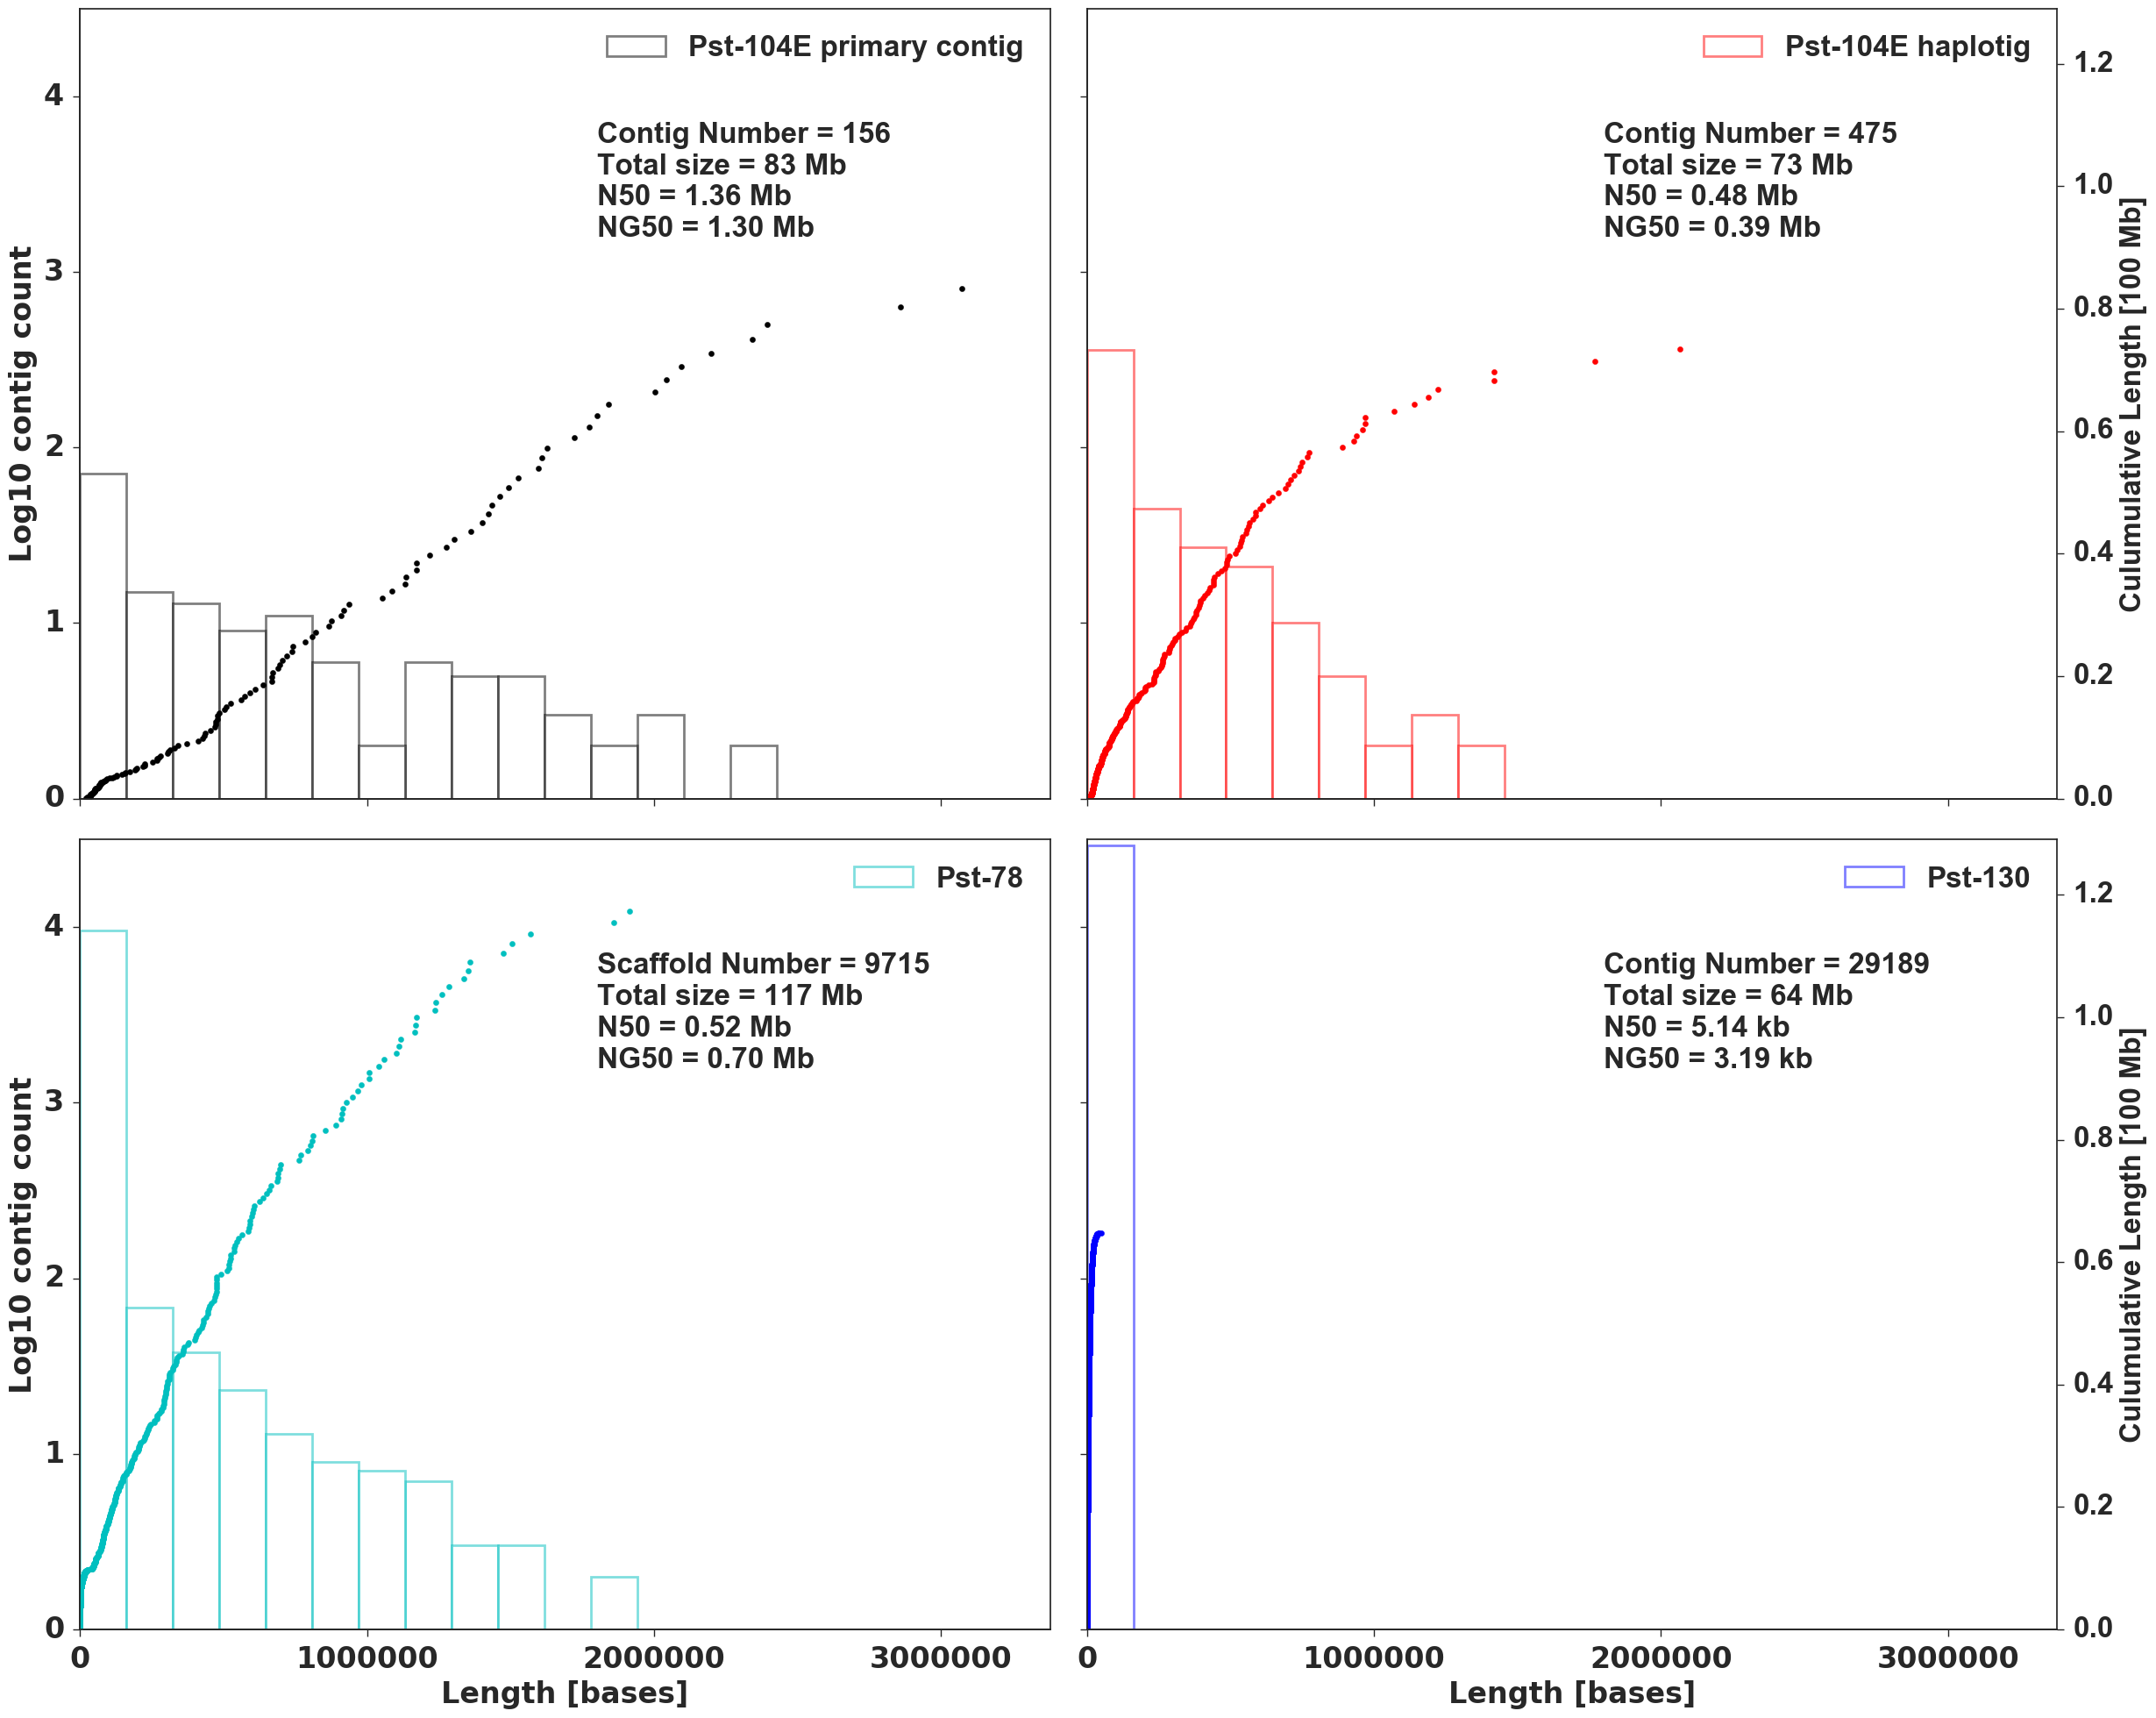

In [38]:
#histogram of 
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(2, 2, figsize=(25,20), sharex='all', sharey='all')

#set style
sns.set_style("ticks")
sns.despine()

#set font size
fs = 24

ax1[0,0].bar(Pst_104E_p_ctg_df.groupby('Length_bin_left')['Length'].count().index,\
        np.log10(Pst_104E_p_ctg_df.groupby('Length_bin_left')['Length'].count()), color='w',\
        edgecolor='k', linewidth = 2,  alpha=0.5, width=bins[1], label="Pst-104E primary contig")

ax1[0,0].text(1800000, 3.2,\
              'Contig Number = %i\nTotal size = %i Mb\nN50 = %.2f Mb\nNG50 = %.2f Mb'%\
              (len(Pst_104E_p_ctg_df), Pst_104E_p_ctg_df.Length.sum()/1000000, \
               Pst_104E_p_ctg_df[Pst_104E_p_ctg_df.Length_cumsum_reverse < 0.5 *Pst_104E_p_ctg_df.Length.sum()]['Length'].head(1)/1000000,\
               Pst_104E_p_ctg_df[Pst_104E_p_ctg_df.Length_cumsum_reverse < 0.5 *predicted_g_size]['Length'].head(1)/1000000)\
              ,horizontalalignment='left', fontsize=fs)

ax1[0,1].bar(Pst_104E_h_ctg_df.groupby('Length_bin_left')['Length'].count().index,\
        np.log10(Pst_104E_h_ctg_df.groupby('Length_bin_left')['Length'].count()), color='w',\
        edgecolor='r', linewidth = 2,  alpha=0.5, width=bins[1], label='Pst-104E haplotig')

ax1[0,1].text(1800000, 3.2,\
              'Contig Number = %i\nTotal size = %i Mb\nN50 = %.2f Mb\nNG50 = %.2f Mb'%\
              (len(Pst_104E_h_ctg_df), Pst_104E_h_ctg_df.Length.sum()/1000000, \
               Pst_104E_h_ctg_df[Pst_104E_h_ctg_df.Length_cumsum_reverse < 0.5 *Pst_104E_h_ctg_df.Length.sum()]\
               ['Length'].head(1)/1000000,\
              Pst_104E_h_ctg_df[Pst_104E_h_ctg_df.Length_cumsum_reverse\
                                < 0.5 *predicted_g_size]['Length'].head(1)/1000000),horizontalalignment='left'\
             , fontsize=fs)


ax1[1,1].bar(Pst_130_df.groupby('Length_bin_left')['Length'].count().index,\
        np.log10(Pst_130_df.groupby('Length_bin_left')['Length'].count()), color='w',\
        edgecolor='b', linewidth = 2,  alpha=0.5, width=bins[1],label='Pst-130')

ax1[1,1].text(1800000, 3.2,\
              'Contig Number = %i\nTotal size = %i Mb\nN50 = %.2f kb\nNG50 = %.2f kb'%\
              (len(Pst_130_df), Pst_130_df.Length.sum()/1000000, \
               Pst_130_df[Pst_130_df.Length_cumsum_reverse < 0.5 *Pst_130_df.Length.sum()]\
               ['Length'].head(1)/1000,\
              Pst_130_df[Pst_130_df.Length_cumsum_reverse < 0.5 *predicted_g_size]['Length']\
               .head(1)/1000),horizontalalignment='left',fontsize=fs)

ax1[1,0].bar(Pst_78_df.groupby('Length_bin_left')['Length'].count().index,\
        np.log10(Pst_78_df.groupby('Length_bin_left')['Length'].count()), color='w',\
        edgecolor='c', linewidth = 2,  alpha=0.5, width=bins[1],label='Pst-78')

ax1[1,0].text(1800000, 3.2,\
              'Scaffold Number = %i\nTotal size = %i Mb\nN50 = %.2f Mb\nNG50 = %.2f Mb'%\
              (len(Pst_78_df), Pst_78_df.Length.sum()/1000000, \
               Pst_78_df[Pst_78_df.Length_cumsum_reverse < 0.5 *Pst_78_df.Length.sum()]\
               ['Length'].head(1)/1000000,\
              Pst_78_df[Pst_78_df.Length_cumsum_reverse < 0.5 *predicted_g_size]['Length'].head(1)/1000000),\
              horizontalalignment='left', fontsize=fs)



    
#plt.ylabel("Frequency",**label_config_y)
#plt.xlabel("Contig Length",**label_config_x)
#plt.title('Contig Length Distribution '+Pst_104E_p_ctg_df['Assembly'].unique()[0][:-3])
#plt.legend(loc=1)
#second plot

#ax12 = ax1.twinx()
#get the labels
major_yticks = ax3.get_ymajorticklabels()
ax2 = ax1[0,0].twinx()
ax2.scatter(Pst_104E_p_ctg_df['Length'], Pst_104E_p_ctg_df['Length_cumsum'], c='k', label='Pst_104E_p contigs', edgecolor='k')
ax2.set_ylim(0, Pst_78_df['Length_cumsum'][len(Pst_78_df['Length_cumsum'])-1]*1.1)
ax2.get_yaxis().set_visible(False)
ax3 = ax1[0,1].twinx()
ax3.scatter(Pst_104E_h_ctg_df['Length'], Pst_104E_h_ctg_df['Length_cumsum'], c='r', label='Pst_104E_h contigs', edgecolor='r')
ax3.set_ylim(0, Pst_78_df['Length_cumsum'][len(Pst_78_df['Length_cumsum'])-1]*1.1)
ax3.set_yticklabels(major_yticks,fontsize=fs)
ax4 = ax1[1,1].twinx()
ax4.scatter(Pst_130_df['Length'], Pst_130_df['Length_cumsum'], c='b', label='Pst_130 contigs', edgecolor='b')
ax4.set_ylim(0, Pst_78_df['Length_cumsum'][len(Pst_78_df['Length_cumsum'])-1]*1.1)
ax4.set_yticklabels(major_yticks,fontsize=fs)
ax5 = ax1[1,0].twinx()
ax5.scatter(Pst_78_df['Length'], Pst_78_df['Length_cumsum'], c='c', label='Pst_78_scaffolds', edgecolor='c')
ax5.set_ylim(0, Pst_78_df['Length_cumsum'][len(Pst_78_df['Length_cumsum'])-1]*1.1)
ax5.get_yaxis().set_visible(False)


for (m,n), subplot in np.ndenumerate(ax1):
    subplot.set_xlim(0, Pst_104E_p_ctg_df['Length'][len(Pst_104E_p_ctg_df['Length'])-1]*1.1)



ax1[0,0].set_ylabel('Log10 contig count',fontsize=fs,weight='bold')
plt.sca(ax1[0,0])
plt.yticks([0,1,2,3,4], fontsize = fs)
plt.legend(loc=5, fontsize=fs)
ax1[1,0].set_ylabel('Log10 contig count', fontsize=fs, weight='bold')
ax1[1,0].set_xlabel('Length [bases]', fontsize=fs, weight='bold')
ax1[1,1].set_xlabel('Length [bases]', fontsize=fs, weight='bold')
ax3.set_ylabel("Culumulative Length [100 Mb]", fontsize=fs, weight='bold')
ax4.set_ylabel("Culumulative Length [100 Mb]", fontsize=fs, weight='bold')


for (m,n), subplot in np.ndenumerate(ax1):
    plt.sca(subplot)
    plt.legend(loc=1, fontsize = fs)
    plt.xticks([0, 1000000, 2000000, 3000000], fontsize = fs)
    plt.yticks([0,1,2,3,4], fontsize = fs)
    #%%!subplot.set_ylim(yval1,yval2)
#plt.ylim(0, Pst_78_df['Length_cumsum'][len(Pst_78_df['Length_cumsum'])-1]*1.1)
#plt.xlim(0, Pst_104E_p_ctg_df['Length'][len(Pst_104E_p_ctg_df['Length'])-1]*1.1)
#plt.xlabel("Contig Length",**label_config_x)
#plt.semilogx('log')
#plt.ylabel("Culmulative Contig Length",**label_config_y)

#ax3.set_yticklabels(ax4.get_ymajorticklabels(),fontsize=12)
ax2.yaxis.set_label_coords(1.05, 0.5)
fig.tight_layout()
out_fn = os.path.join(outdir, 'Assembly_summary_stats.png')
fig.savefig(out_fn, dpi=600)

In [19]:
Pst_104E_p_ctg_df.sort_values('ID').head(30)['Length'].sum()

48057653

In [20]:
#now writhe out the 30 biggest contigs into the circa_path
seq_list = []
out_fn = 'Pst_104E_p_ctg.30_largest_contigs.fa'
for seq in SeqIO.parse(open(os.path.join(full_path, Pst_104E_p_ctg), 'r'), 'fasta'):
    if seq.id in Pst_104E_p_ctg_df.tail(30).ID.tolist():
        seq_list.append(seq)
SeqIO.write(seq_list, open(os.path.join(circa_path, out_fn), 'w'), 'fasta')
Pst_104E_p_ctg_df.tail(30).sort_values('Length', ascending=False).loc[:, ['ID','Length']].\
    to_csv(os.path.join(circa_path, out_fn.replace('.fa','.genome')), index=None, sep='\t')

In [21]:
Pst_104E_p_ctg_df.tail(30).loc[:, ['ID','Length']].sort_values('Length', ascending=False).\
    to_csv(os.path.join(circa_path, out_fn.replace('.fa','.genome')), index=None, sep='\t')

In [22]:
#now writhe out the 30-60 biggest contigs into the circa_path
seq_list = []
out_fn = 'Pst_104E_p_ctg.second_30_largest_contigs.fa'
index_range = Pst_104E_p_ctg_df.index[(Pst_104E_p_ctg_df.index.max()-30+1-30):(Pst_104E_p_ctg_df.index.max()-30+1)]
for seq in SeqIO.parse(open(os.path.join(full_path, Pst_104E_p_ctg), 'r'), 'fasta'):
    if seq.id in Pst_104E_p_ctg_df.loc[\
            index_range,:].ID.tolist():
        seq_list.append(seq)
SeqIO.write(seq_list, open(os.path.join(circa_path, out_fn), 'w'), 'fasta')
Pst_104E_p_ctg_df.loc[index_range,['ID','Length']].sort_values('Length', ascending=False).\
    to_csv(os.path.join(circa_path, out_fn.replace('.fa','.genome')), index=None, sep='\t')

In [23]:
#now writhe out the 30 biggest contigs into the circa_path
seq_list = []
out_fn = 'Pst_104E_p_ctg.third_30_largest_contigs.fa'
index_range = Pst_104E_p_ctg_df.index[(Pst_104E_p_ctg_df.index.max()-30+1-30-30):(Pst_104E_p_ctg_df.index.max()-30+1-30)]
for seq in SeqIO.parse(open(os.path.join(full_path, Pst_104E_p_ctg), 'r'), 'fasta'):
    if seq.id in Pst_104E_p_ctg_df.loc[\
            index_range,:].ID.tolist():
        seq_list.append(seq)
SeqIO.write(seq_list, open(os.path.join(circa_path, out_fn), 'w'), 'fasta')
Pst_104E_p_ctg_df.loc[index_range,['ID','Length']].sort_values('Length', ascending=False).\
    to_csv(os.path.join(circa_path, out_fn.replace('.fa','.genome')), index=None, sep='\t')

In [24]:
Pst_104E_p_ctg_df.tail(30).sort_values('Length', ascending=False)

,ID,Length,%GC,Assembly,Length_cumsum,Length_cumsum_reverse,Length_bin,Length_bin_left
155,pcontig_000,3073024,44.124485,Pst_104E_v12_p_ctg.fa,83355616,3073024,"(2911302, 3073041]",2911302
154,pcontig_001,2856984,44.484253,Pst_104E_v12_p_ctg.fa,80282592,5930008,"(2749563, 2911302]",2749563
153,pcontig_003,2392543,44.391720,Pst_104E_v12_p_ctg.fa,77425608,8322551,"(2264346, 2426085]",2264346
152,pcontig_002,2342972,44.844625,Pst_104E_v12_p_ctg.fa,75033065,10665523,"(2264346, 2426085]",2264346
151,pcontig_005,2199355,44.430617,Pst_104E_v12_p_ctg.fa,72690093,12864878,"(2102607, 2264346]",2102607
150,pcontig_004,2094696,44.360518,Pst_104E_v12_p_ctg.fa,70490738,14959574,"(1940868, 2102607]",1940868
149,pcontig_006,2041788,44.434339,Pst_104E_v12_p_ctg.fa,68396042,17001362,"(1940868, 2102607]",1940868
148,pcontig_007,2002714,44.492873,Pst_104E_v12_p_ctg.fa,66354254,19004076,"(1940868, 2102607]",1940868
147,pcontig_008,1839735,44.339919,Pst_104E_v12_p_ctg.fa,64351540,20843811,"(1779129, 1940868]",1779129
146,pcontig_011,1802533,44.799679,Pst_104E_v12_p_ctg.fa,62511805,22646344,"(1779129, 1940868]",1779129


In [25]:
Pst_104E_h_ctg_df.columns

Index(['ID', 'Length', '%GC', 'Assembly', 'Length_cumsum',
       'Length_cumsum_reverse', 'Length_bin', 'Length_bin_left'],
      dtype='object')

Second part on comparison between primary and haplotigs

In [26]:
def make_contig_df(contig_path, contig_name):
    """
    Make contig Dataframe from fasta file.
    """    
    f_handle = open(contig_path+'/'+contig_name, mode='r')
    contigs = SeqIO.parse(f_handle, 'fasta')
    contig_length = []
    contig_id =[]
    contig_GC = []
    assembly_id = []
    for x in contigs:
        contig_id.append(x.id)
        contig_length.append(len(x.seq))
        contig_GC.append(SeqUtils.GC(x.seq))
        assembly_id.append(contig_name)
    s1 = pd.Series(contig_id, name='ID')
    s2 = pd.Series(contig_length, name='Length')
    s3 = pd.Series(contig_GC, name='%GC')
    s4 = pd.Series(assembly_id, name="Assembly")
    contig_df = pd.concat([s1, s2, s3, s4], axis=1)
    f_handle.close()
    return contig_df

In [27]:
#function to add another column for P and A_contig identification to dataframe
def P_and_A_identifier(df):
    """Method to add primary and alternative contig identifier rows to FC dataframes"""
    primary_list = []
    alternative_list = []
    return_df = df.iloc[:,:]
    for x in return_df['ID']:
        if x.startswith('hcontig'):
            primary_list.append(0)
            alternative_list.append(1)
        else:
            primary_list.append(1)
            alternative_list.append(0)
    return_df["P_contig"] = pd.Series(primary_list)
    return_df["A_contig"] = pd.Series(alternative_list)
    return_df = return_df.reset_index(drop=True)
    return return_df

In [28]:
#define path and such
ASSEMBLY_FOLDER = '/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/analysis/PacBio_SCH1743/FALCON_0_4_assemblies/p_assemblies/v9_1/032017_assembly/'
genome = 'Pst_104E_v12_ph_ctg.fa'

In [29]:
Pst_104E_v12_df = make_contig_df(ASSEMBLY_FOLDER, genome)

In [30]:
Pst_104E_v12_df = P_and_A_identifier(Pst_104E_v12_df)

In [31]:
#get the pcontigs
Pst_104E_v12_df['P_ID'] = Pst_104E_v12_df.ID.str.extract(r'contig_([0-9]*)')

Pst_104E_v12_df['P_ID'] = 'pcontig_' + Pst_104E_v12_df['P_ID']

/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [32]:
Pst_104E_v12_df['pwh_contig'] = 0
pwh_index = Pst_104E_v12_df[Pst_104E_v12_df.ID.isin(Pst_104E_v12_df[(Pst_104E_v12_df.A_contig == 1)].P_ID.unique())].index
Pst_104E_v12_df.loc[pwh_index,'pwh_contig'] = 1

In [33]:
Pst_104E_v12_df.head()

,ID,Length,%GC,Assembly,P_contig,A_contig,P_ID,pwh_contig
0,pcontig_193,63102,44.470857,Pst_104E_v12_ph_ctg.fa,1,0,pcontig_193,1
1,pcontig_225,27482,42.169420,Pst_104E_v12_ph_ctg.fa,1,0,pcontig_225,1
2,pcontig_164,54539,43.059095,Pst_104E_v12_ph_ctg.fa,1,0,pcontig_164,1
3,pcontig_166,53330,43.648978,Pst_104E_v12_ph_ctg.fa,1,0,pcontig_166,1
4,pcontig_184,44246,43.104461,Pst_104E_v12_ph_ctg.fa,1,0,pcontig_184,1


In [34]:
#some quick calculations for the paper
Pst_104E_v12_df[Pst_104E_v12_df.pwh_contig == 1]['Length'].sum() 


79770604

In [35]:
Pst_104E_v12_df[(Pst_104E_v12_df.pwh_contig == 0) & (Pst_104E_v12_df.P_contig == 1)]['Length'].sum() 

3585012

In [36]:
Pst_104E_v12_df[(Pst_104E_v12_df.pwh_contig == 0) & (Pst_104E_v12_df.P_contig == 1)]['Length'].count()

57

In [37]:
Pst_104E_v12_df[(Pst_104E_v12_df.pwh_contig == 0) & (Pst_104E_v12_df.P_contig == 0)]['Length'].count()

475

Write out the p_congits with and without haplotigs

In [38]:
Pst_104E_v12_df[(Pst_104E_v12_df.pwh_contig == 0) & (Pst_104E_v12_df.P_contig == 1)].iloc[:,0]\
    .to_csv(os.path.join(ASSEMBLY_FOLDER, 'Pst_104E_v12_pwoh.txt'), sep='\t', header = None, index=None)

In [39]:
Pst_104E_v12_df[(Pst_104E_v12_df.pwh_contig == 1) & (Pst_104E_v12_df.P_contig == 1)].iloc[:,0]\
    .to_csv(os.path.join(ASSEMBLY_FOLDER, 'Pst_104E_v12_pwh.txt'), sep='\t', header = None, index=None)

In [40]:
#pull in gff dataframes from genes
p_gene_gff = pd.read_csv(os.path.join(ASSEMBLY_FOLDER, 'Pst_104E_v12_p_ctg.anno.gff3'), sep='\t', header=None)

In [41]:
#pull in gff dataframes from genes
h_gene_gff = pd.read_csv(os.path.join(ASSEMBLY_FOLDER, 'Pst_104E_v12_h_ctg.anno.gff3'), sep='\t', header=None)

In [42]:
p_gene_gff.head()

,0,1,2,3,4,5,6,7,8
0,pcontig_193,EVM,gene,5386,5862,.,+,.,ID=evm.TU.pcontig_193.6;Name=gene_model_pconti...
1,pcontig_193,EVM,mRNA,5386,5862,.,+,.,ID=evm.model.pcontig_193.6;Parent=evm.TU.pcont...
2,pcontig_193,EVM,exon,5386,5862,.,+,.,ID=evm.model.pcontig_193.6.exon1;Parent=evm.mo...
3,pcontig_193,EVM,CDS,5386,5862,.,+,0,ID=cds.evm.model.pcontig_193.6;Parent=evm.mode...
4,pcontig_225,EVM,gene,22308,22664,.,+,.,ID=evm.TU.pcontig_225.7;Name=gene_model_pconti...


In [43]:
#list of all contigs with haplotig
pwh_list = Pst_104E_v12_df[(Pst_104E_v12_df.pwh_contig == 1)]['ID'].unique()

In [44]:
pwh_gff = p_gene_gff[p_gene_gff[0].isin(\
        Pst_104E_v12_df[(Pst_104E_v12_df.pwh_contig == 1)]['ID'].unique())]

In [45]:
pwh_gff.to_csv(os.path.join(ASSEMBLY_FOLDER, 'Pst_104E_v12_p_ctg.anno.gff3'.replace('p_ctg', 'pwh_ctg')), sep='\t',\
              index=None, header =None)

In [46]:
pwoh_gff = p_gene_gff[p_gene_gff[0].isin(\
        Pst_104E_v12_df[(Pst_104E_v12_df.pwh_contig == 0) & (Pst_104E_v12_df.P_contig == 1)]['ID'].unique())]
pwoh_gff.to_csv(os.path.join(ASSEMBLY_FOLDER, 'Pst_104E_v12_p_ctg.anno.gff3'.replace('p_ctg', 'pwoh_ctg')), sep='\t',\
              index=None, header =None)

In [47]:
#counts of genes
pwoh_gff[pwoh_gff[2] == 'gene'][2].count()

#counts of exons
pwoh_gff[pwoh_gff[2] == 'exon'][2].count()

#counts of introns per gene 
(pwoh_gff[pwoh_gff[2] == 'exon'][2].count() - pwoh_gff[pwoh_gff[2] == 'gene'][2].count())/pwoh_gff[pwoh_gff[2] == 'gene'][2].count()

#counts length
pwoh_gff['Length'] = pwoh_gff[4] - pwoh_gff[3]
pwoh_gff[pwoh_gff[2] == 'gene']["Length"].median()

pwoh_gff[pwoh_gff[2] == 'gene']["Length"].mean()

/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1290.1488

In [48]:
#counts of genes
print(pwh_gff[pwh_gff[2] == 'gene'][2].count())

#counts of exons
print(pwh_gff[pwh_gff[2] == 'exon'][2].count())

#counts of introns per gene 
print(\
    (pwh_gff[pwh_gff[2] == 'exon'][2].count() - pwh_gff[pwh_gff[2] == 'gene'][2].count())\
      /pwh_gff[pwh_gff[2] == 'gene'][2].count()\
)
#counts length
pwh_gff['Length'] = pwh_gff[4] - pwh_gff[3]
print(pwh_gff[pwh_gff[2] == 'gene']["Length"].median())

print(pwh_gff[pwh_gff[2] == 'gene']["Length"].mean())

15303
68042
3.44631771548
1210.0
1545.97640985


/Users/ben/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
#counts of genes
print(h_gene_gff[h_gene_gff[2] == 'gene'][2].count())

#counts of exons
print(h_gene_gff[h_gene_gff[2] == 'exon'][2].count())

#counts of introns per gene 
print(\
    (h_gene_gff[h_gene_gff[2] == 'exon'][2].count() - h_gene_gff[h_gene_gff[2] == 'gene'][2].count())\
      /h_gene_gff[h_gene_gff[2] == 'gene'][2].count()\
)
#counts length
h_gene_gff['Length'] = h_gene_gff[4] - h_gene_gff[3]
print(h_gene_gff[h_gene_gff[2] == 'gene']["Length"].median())

print(h_gene_gff[h_gene_gff[2] == 'gene']["Length"].mean())

14321
63249
3.41652119265
1189.0
1539.51120732


Now pull in the coverager dataframes from the TE analysis and calculate the average coverage for each contig set.
These files were produced by Pst_104E_v12_TE_filtering_and_summary_p_contigs and h_version

In [50]:
TE_path = '/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/analysis/PacBio_SCH1743/FALCON_0_4_assemblies/p_assemblies/v9_1/Pst_104E_v12/TE_analysis/TE_analysis/'

In [51]:
p_TE_cov_df = pd.read_csv(os.path.join(TE_path,'Pst_104E_v12_p_ctg.REPET.superfamily.cov' ), header=None, sep='\t')

KeyboardInterrupt: 

In [52]:
#this gets ride of the overlap between different TE families and classes
p_TE_cov_df = p_TE_cov_df.drop_duplicates([0,1])

NameError: name 'p_TE_cov_df' is not defined

In [ ]:
pwh_TE_cov_per_contig = p_TE_cov_df[p_TE_cov_df[0].isin(pwh_list)].pivot_table(values=1, columns=0, aggfunc='count')

In [ ]:
pwoh_TE_cov_per_contig = p_TE_cov_df[~p_TE_cov_df[0].isin(pwh_list)].pivot_table(values=1, columns=0, aggfunc='count')

In [ ]:
pwh_TE_cov_per_contig.sum()/Pst_104E_v12_df[Pst_104E_v12_df.ID.isin(pwh_list)]['Length'].sum()

In [ ]:
pwoh_TE_cov_per_contig.sum()/Pst_104E_v12_df[(~Pst_104E_v12_df.ID.isin(pwh_list))&(Pst_104E_v12_df.P_contig == 1)]['Length'].sum()

In [ ]:
#now for haplotigs
h_TE_cov_df = pd.read_csv(os.path.join(TE_path,'Pst_104E_v12_h_ctg.REPET.superfamily.cov' ), header=None, sep='\t')
h_TE_cov_df = h_TE_cov_df.drop_duplicates([0,1])

In [ ]:
h_TE_cov_per_contig = h_TE_cov_df.pivot_table(values=1, columns=0, aggfunc='count')

In [ ]:
h_TE_cov_per_contig.sum()/Pst_104E_v12_df[(Pst_104E_v12_df.P_contig == 0)]['Length'].sum()